# About Data

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

You can even take this a step further and try and build a Regression model to Profit. Link:https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?select=Sample+-+Superstore.csv

# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Superstore.xls')

# Data Exploration

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Duplicated Data

In [5]:
data.duplicated().sum()

0

# Manual Feature Selection

1- Null Features

In [6]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

2- Unimportant Data

In [7]:
data.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [8]:
data=data.drop(['Row ID','Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name','Postal Code','Product ID'],axis=1)

In [9]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


3- Low Variance

In [10]:
data=data.drop(['Country'],axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Product Name  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


4- Same Correlation

In [12]:
data=data.drop(['City','State'],axis=1)

In [13]:
data=data.drop(['Sub-Category','Product Name'],axis=1)

In [14]:
data.head()

,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,South,Furniture,261.9600,2,0.00,41.9136
1,Second Class,Consumer,South,Furniture,731.9400,3,0.00,219.5820
2,Second Class,Corporate,West,Office Supplies,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,South,Furniture,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,South,Office Supplies,22.3680,2,0.20,2.5164


# Encoding

In [15]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [16]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [17]:
#Ordinary Encoding
oe = OrdinalEncoder(categories=[['Standard Class', 'Second Class', 'First Class','Same Day']])
Ship_Mode_encoded = oe.fit_transform(data[['Ship Mode']])
data.insert(1,'Ship Mode_encoded', Ship_Mode_encoded, True) 
data.drop('Ship Mode',axis=1 , inplace=True)
data.head()

,Ship Mode_encoded,Segment,Region,Category,Sales,Quantity,Discount,Profit
0,1.0,Consumer,South,Furniture,261.9600,2,0.00,41.9136
1,1.0,Consumer,South,Furniture,731.9400,3,0.00,219.5820
2,1.0,Corporate,West,Office Supplies,14.6200,2,0.00,6.8714
3,0.0,Consumer,South,Furniture,957.5775,5,0.45,-383.0310
4,0.0,Consumer,South,Office Supplies,22.3680,2,0.20,2.5164


In [18]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [19]:
#One-Hot Encoding
seg_ohe = OneHotEncoder()
seg_ohe_transf=seg_ohe.fit_transform(data[['Segment']])
Segment_encoded= pd.DataFrame(seg_ohe_transf.toarray(), columns=seg_ohe.get_feature_names_out(['Segment']))
Segment_1=Segment_encoded.iloc[:,0]
Segment_1_name=Segment_encoded.columns[0]
Segment_2=Segment_encoded.iloc[:,1]
Segment_2_name=Segment_encoded.columns[1]
Segment_3=Segment_encoded.iloc[:,2]
Segment_3_name=Segment_encoded.columns[2]
data.insert(2, Segment_1_name, Segment_1, True) 
data.insert(3, Segment_2_name, Segment_2, True) 
data.insert(4, Segment_3_name, Segment_3, True) 
data.drop('Segment',axis=1 , inplace=True)
data.head()

,Ship Mode_encoded,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region,Category,Sales,Quantity,Discount,Profit
0,1.0,1.0,0.0,0.0,South,Furniture,261.9600,2,0.00,41.9136
1,1.0,1.0,0.0,0.0,South,Furniture,731.9400,3,0.00,219.5820
2,1.0,0.0,1.0,0.0,West,Office Supplies,14.6200,2,0.00,6.8714
3,0.0,1.0,0.0,0.0,South,Furniture,957.5775,5,0.45,-383.0310
4,0.0,1.0,0.0,0.0,South,Office Supplies,22.3680,2,0.20,2.5164


In [20]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [21]:
#One-Hot Encoding
reg_ohe = OneHotEncoder()
reg_ohe_transf=reg_ohe.fit_transform(data[['Region']])
Region_encoded=pd.DataFrame(reg_ohe_transf.toarray(), columns=reg_ohe.get_feature_names_out(['Region']))
Region_1=Region_encoded.iloc[:,0]
Region_1_name=Region_encoded.columns[0]
Region_2=Region_encoded.iloc[:,1]
Region_2_name=Region_encoded.columns[1]
Region_3=Region_encoded.iloc[:,2]
Region_3_name=Region_encoded.columns[2]
Region_4=Region_encoded.iloc[:,3]
Region_4_name=Region_encoded.columns[3]
data.insert(4, Region_1_name, Region_1, True) 
data.insert(5, Region_2_name, Region_2, True) 
data.insert(6, Region_3_name, Region_3, True)
data.insert(7, Region_4_name, Region_4, True)  
data.drop('Region',axis=1 , inplace=True)
data.head()

,Ship Mode_encoded,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,Region_West,Category,Sales,Quantity,Discount,Profit
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Furniture,261.9600,2,0.00,41.9136
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Furniture,731.9400,3,0.00,219.5820
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Office Supplies,14.6200,2,0.00,6.8714
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Furniture,957.5775,5,0.45,-383.0310
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Office Supplies,22.3680,2,0.20,2.5164


In [22]:
#One-Hot Encoding
cat_ohe = OneHotEncoder()
cat_ohe_transf=cat_ohe.fit_transform(data[['Category']])
Category_encoded= pd.DataFrame(cat_ohe_transf.toarray(), columns=cat_ohe.get_feature_names_out(['Category']))
Category_1=Category_encoded.iloc[:,0]
Category_1_name=Category_encoded.columns[0]
Category_2=Category_encoded.iloc[:,1]
Category_2_name=Category_encoded.columns[1]
Category_3=Category_encoded.iloc[:,2]
Category_3_name=Category_encoded.columns[2]
data.insert(9, Category_1_name, Category_1, True) 
data.insert(10, Category_2_name, Category_2, True) 
data.insert(11, Category_3_name, Category_3, True) 
data.drop('Category',axis=1 , inplace=True)
data.head()

,Ship Mode_encoded,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Sales,Quantity,Discount,Profit
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,261.9600,2,0.00,41.9136
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,731.9400,3,0.00,219.5820
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,14.6200,2,0.00,6.8714
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,957.5775,5,0.45,-383.0310
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.3680,2,0.20,2.5164


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ship Mode_encoded         9994 non-null   float64
 1   Segment_Consumer          9994 non-null   float64
 2   Segment_Corporate         9994 non-null   float64
 3   Segment_Home Office       9994 non-null   float64
 4   Region_Central            9994 non-null   float64
 5   Region_East               9994 non-null   float64
 6   Region_South              9994 non-null   float64
 7   Region_West               9994 non-null   float64
 8   Category_Furniture        9994 non-null   float64
 9   Category_Office Supplies  9994 non-null   float64
 10  Category_Technology       9994 non-null   float64
 11  Sales                     9994 non-null   float64
 12  Quantity                  9994 non-null   int64  
 13  Discount                  9994 non-null   float64
 14  Profit  

# Data Visualization

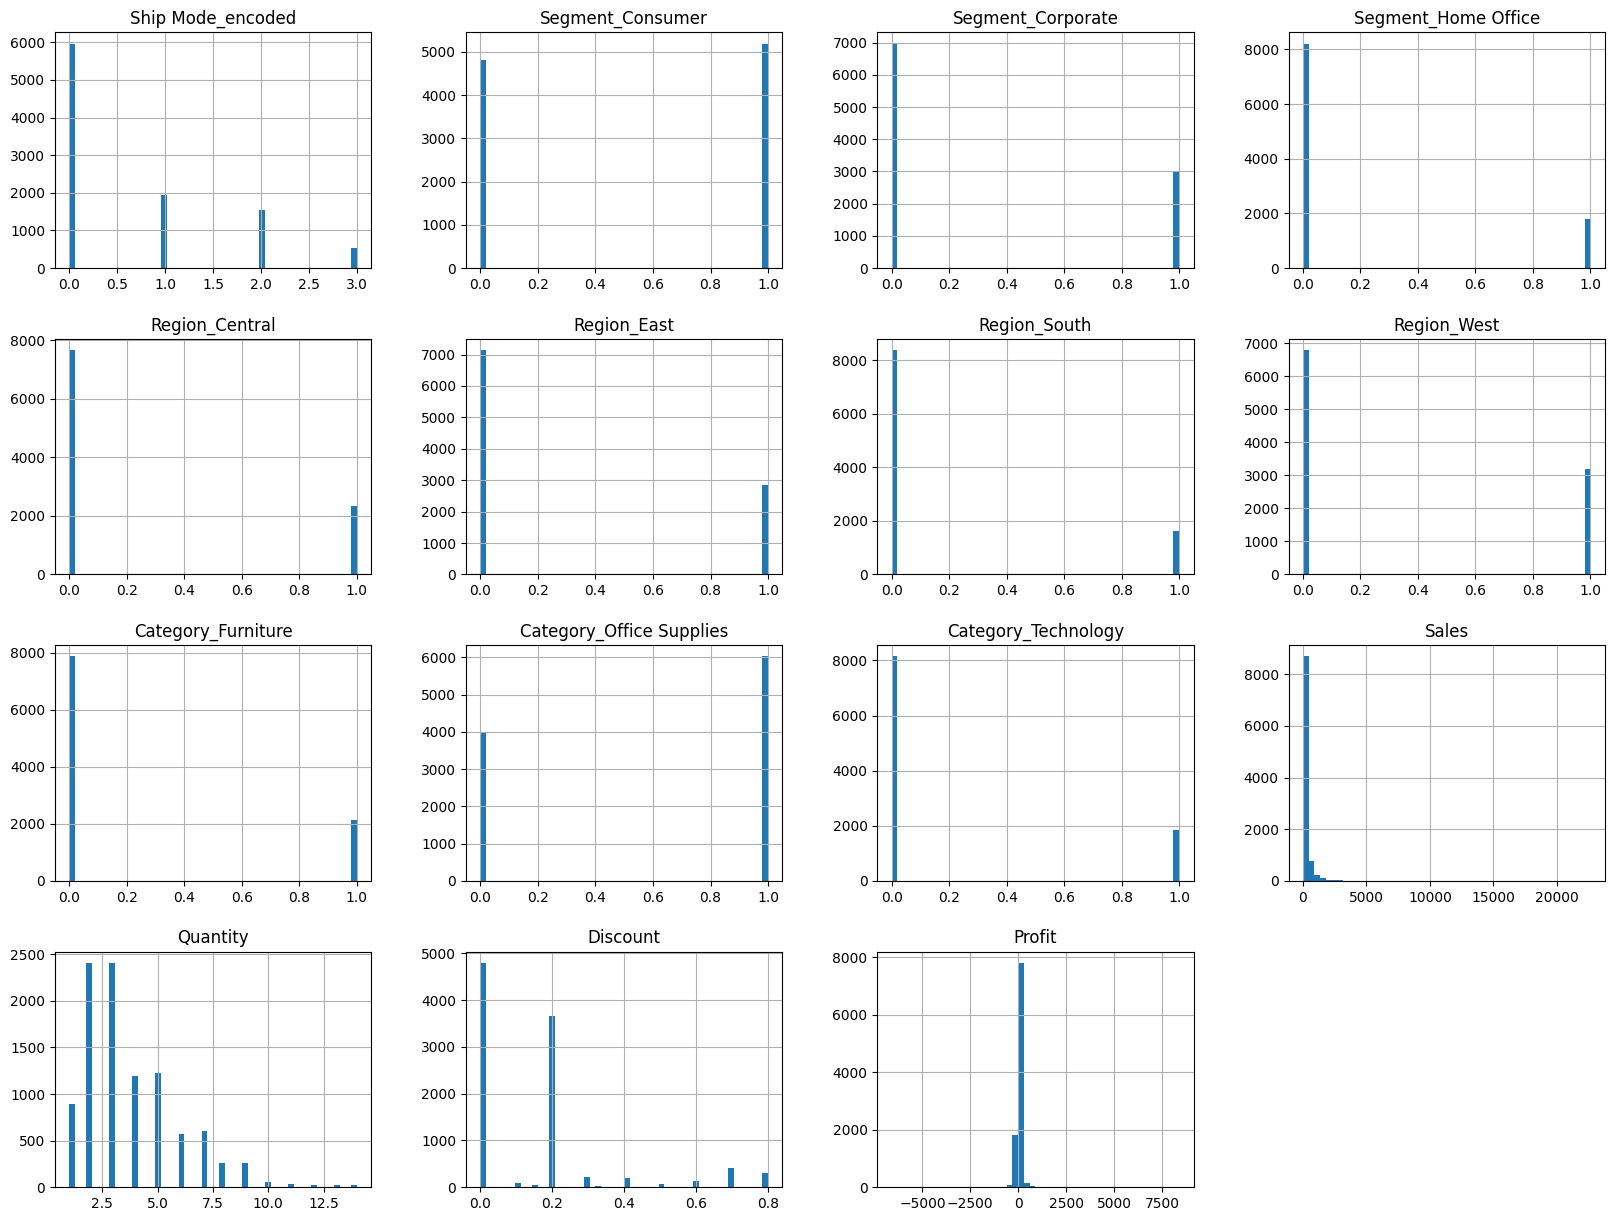

In [24]:
data.hist(bins=50, figsize=(20,15))
plt.show()

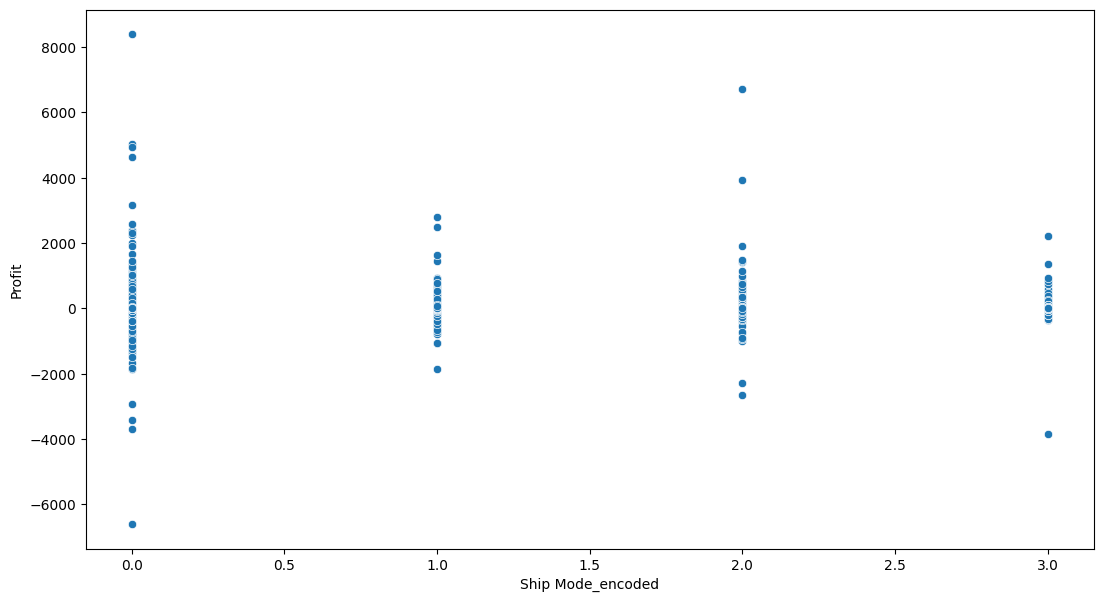

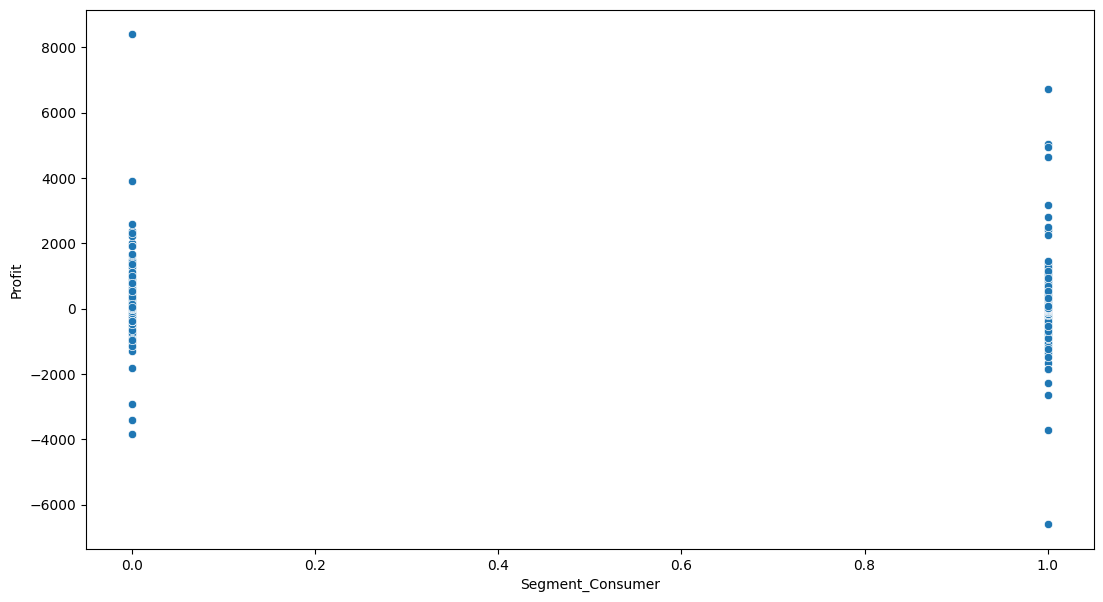

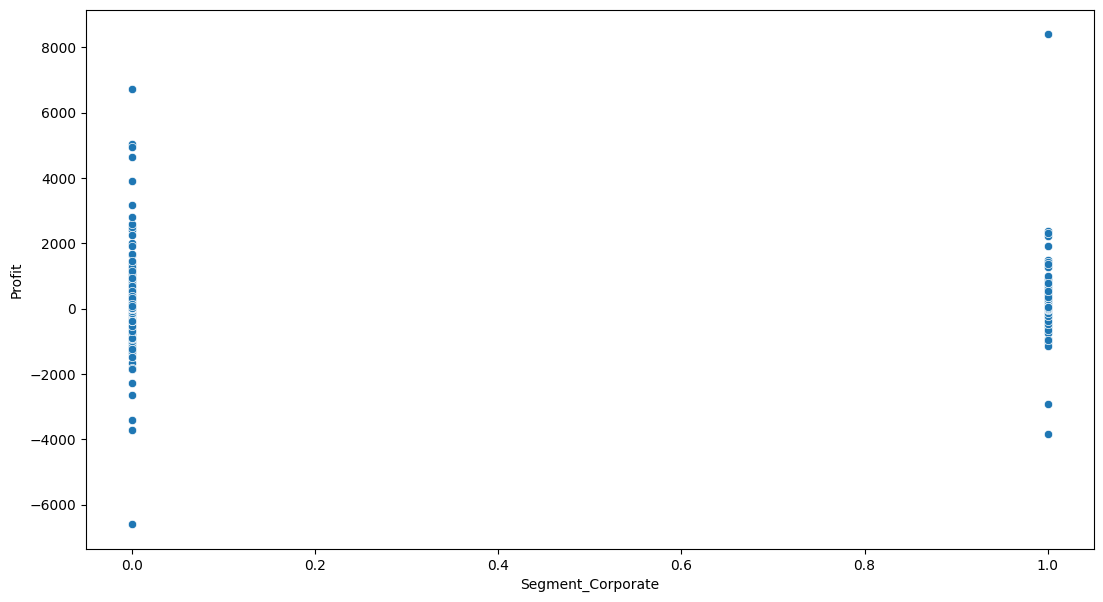

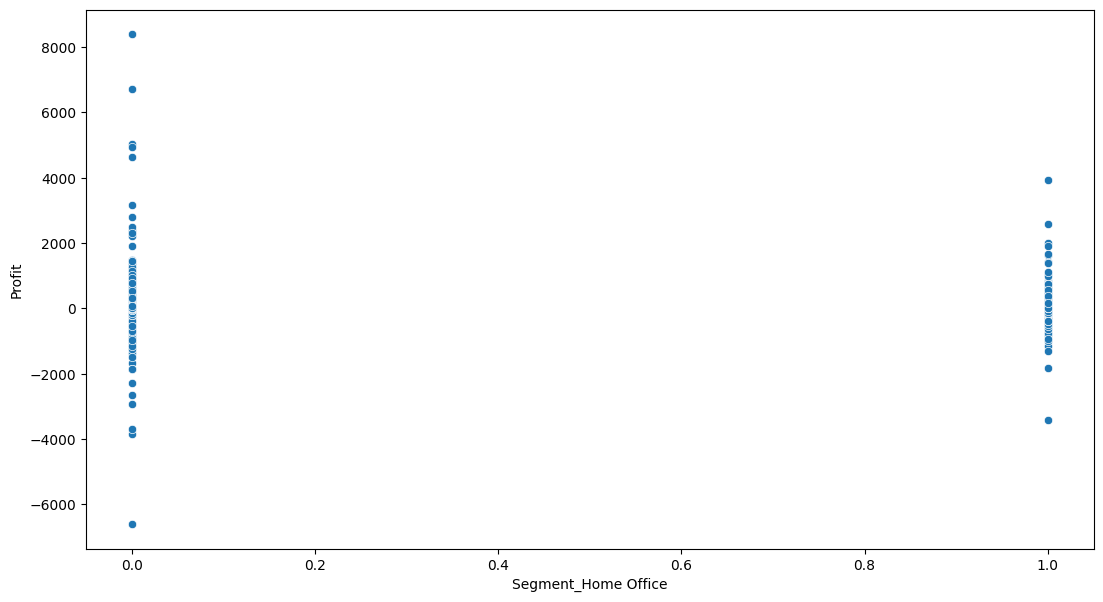

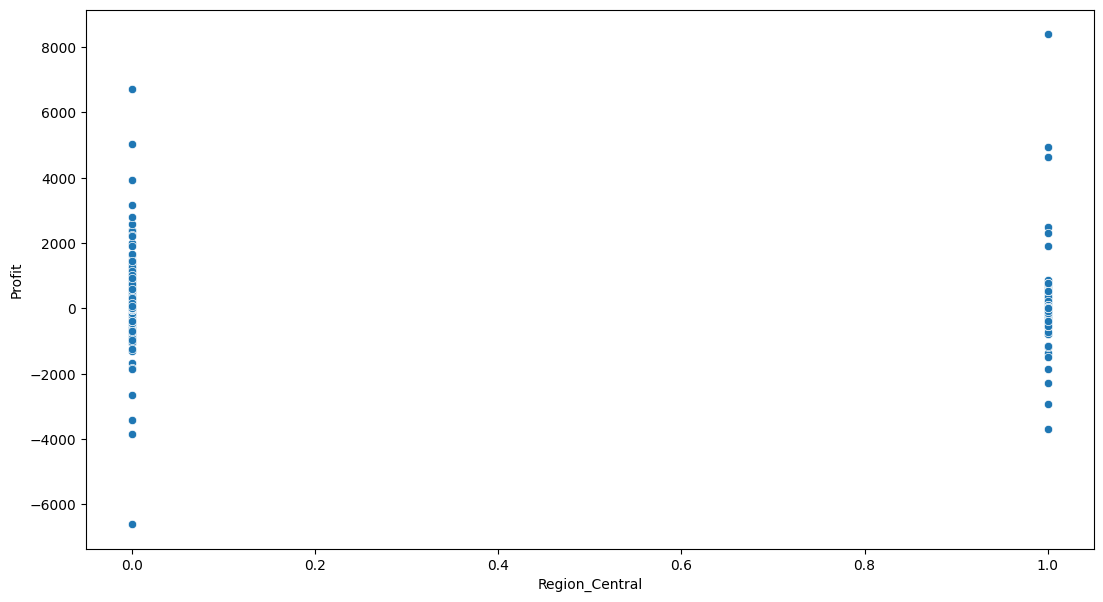

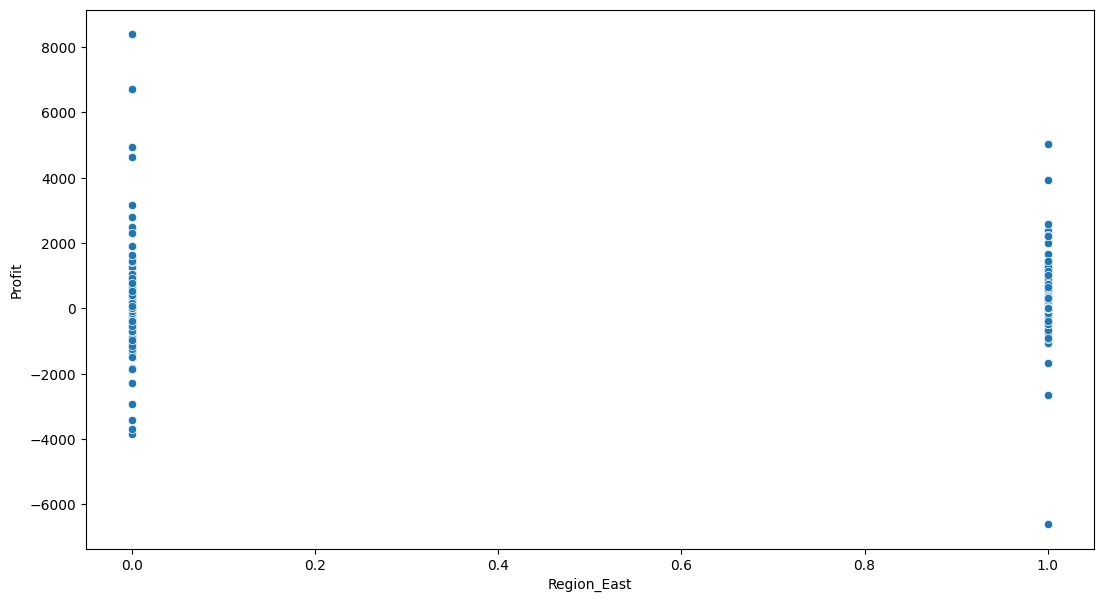

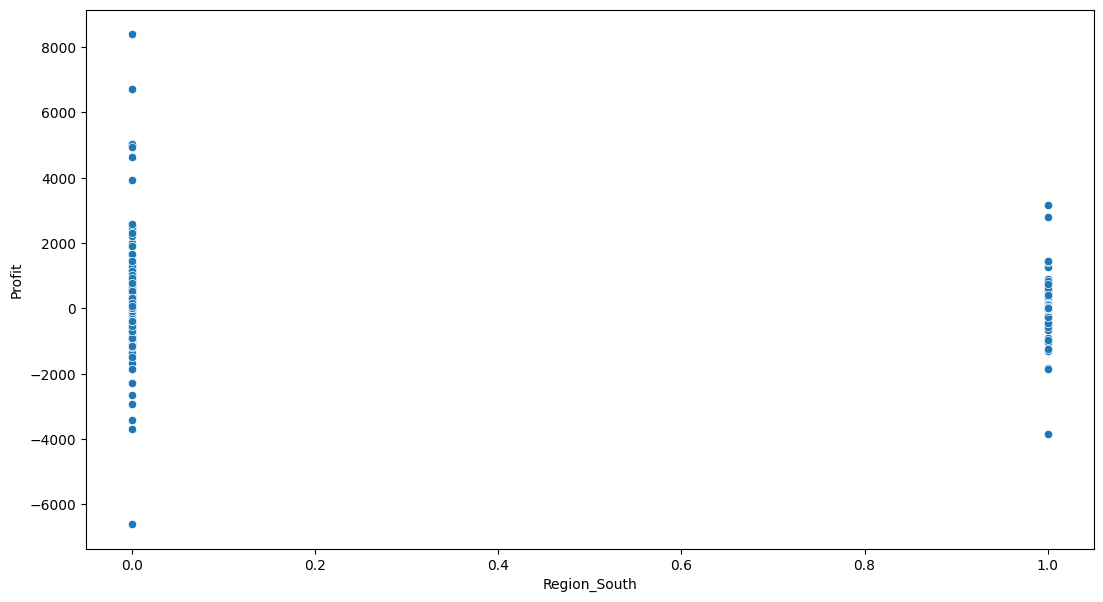

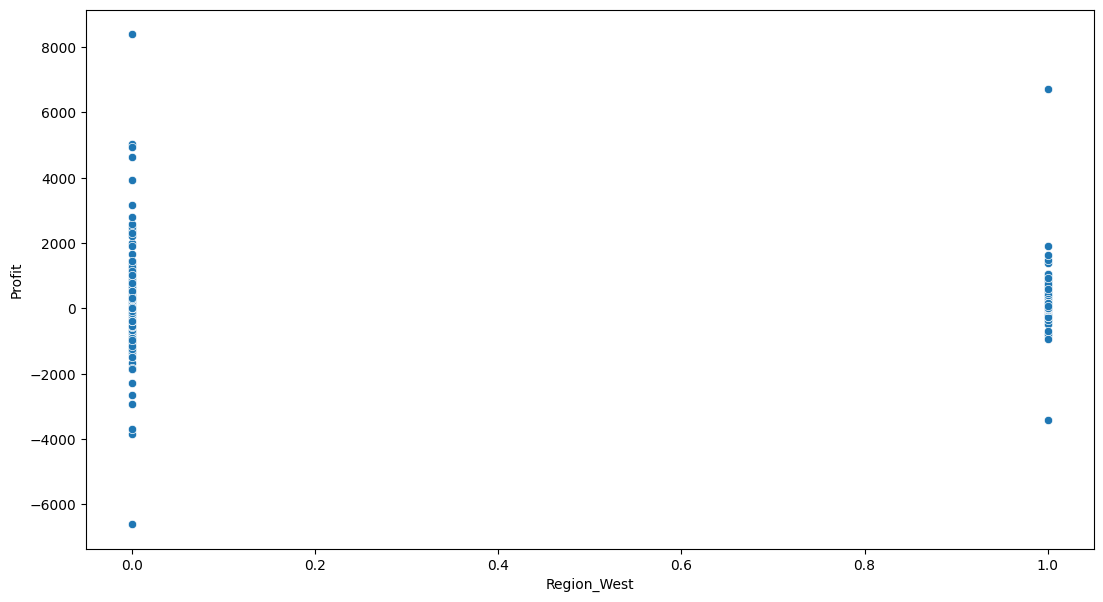

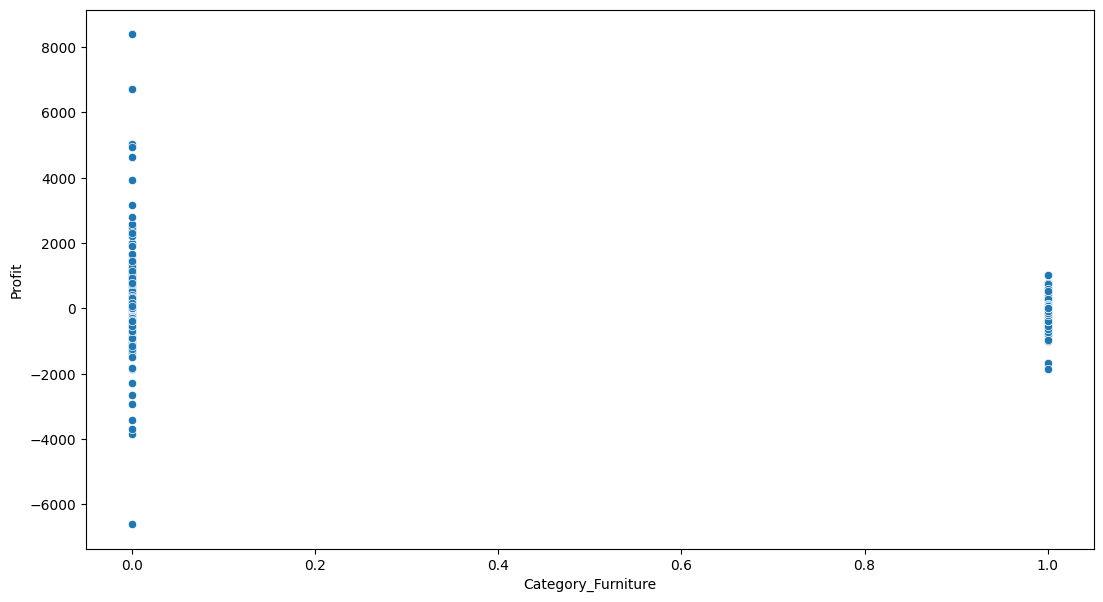

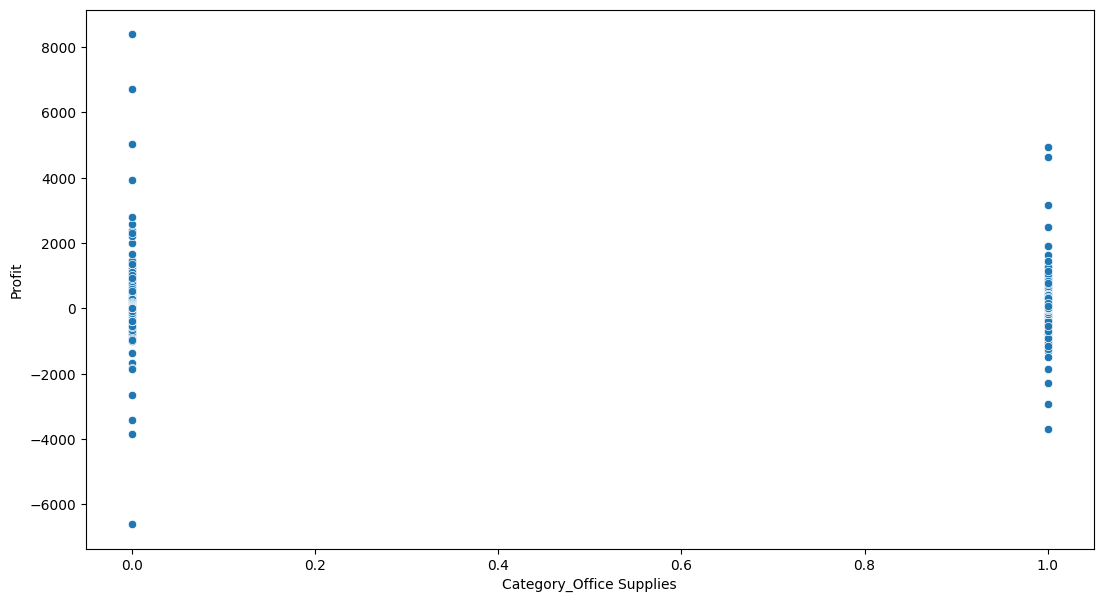

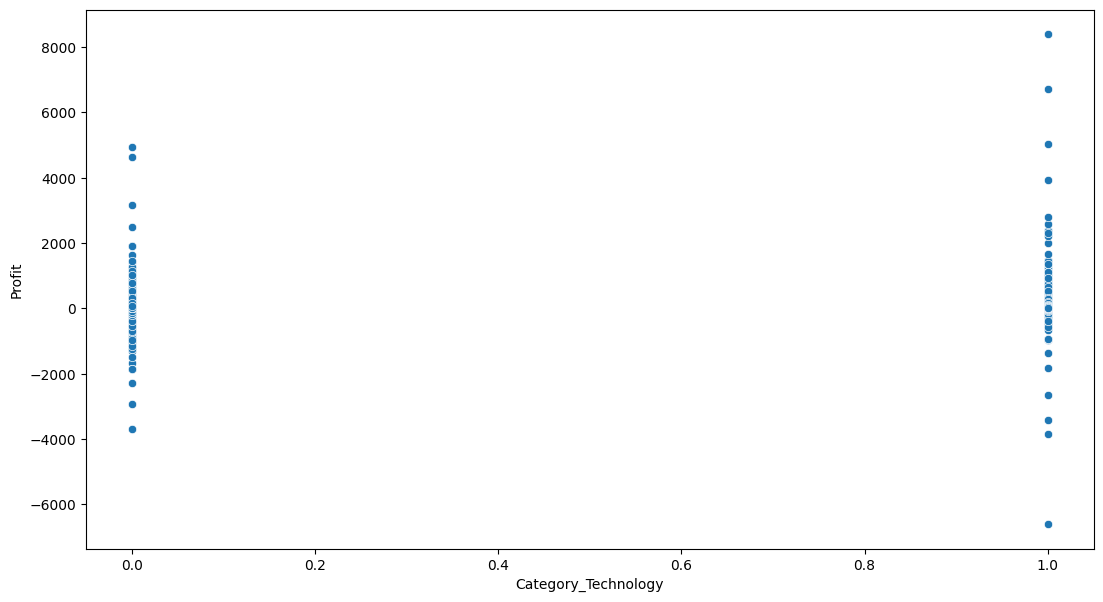

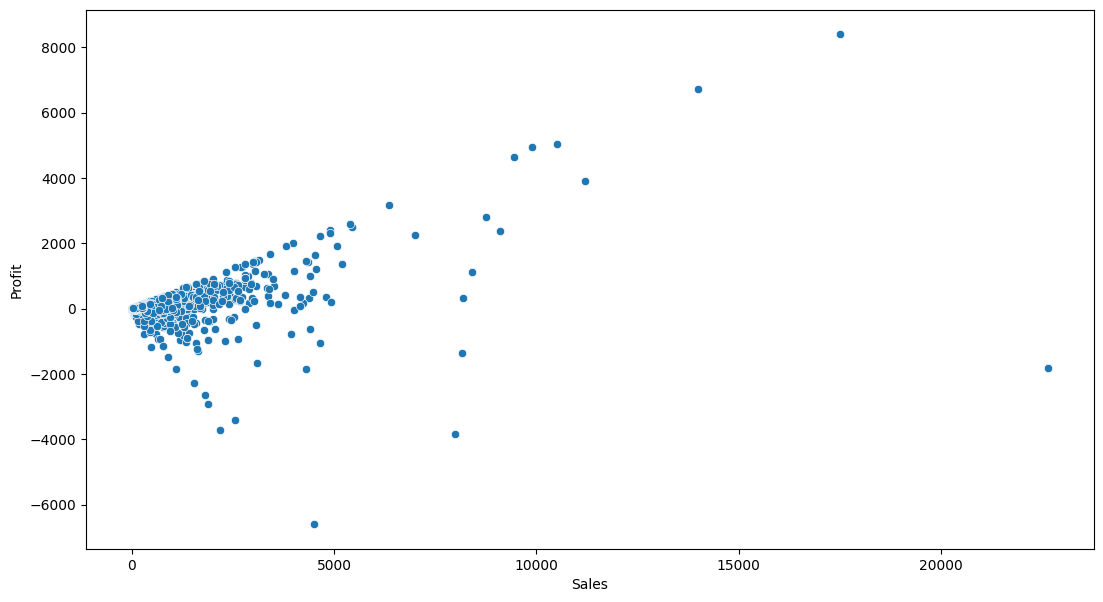

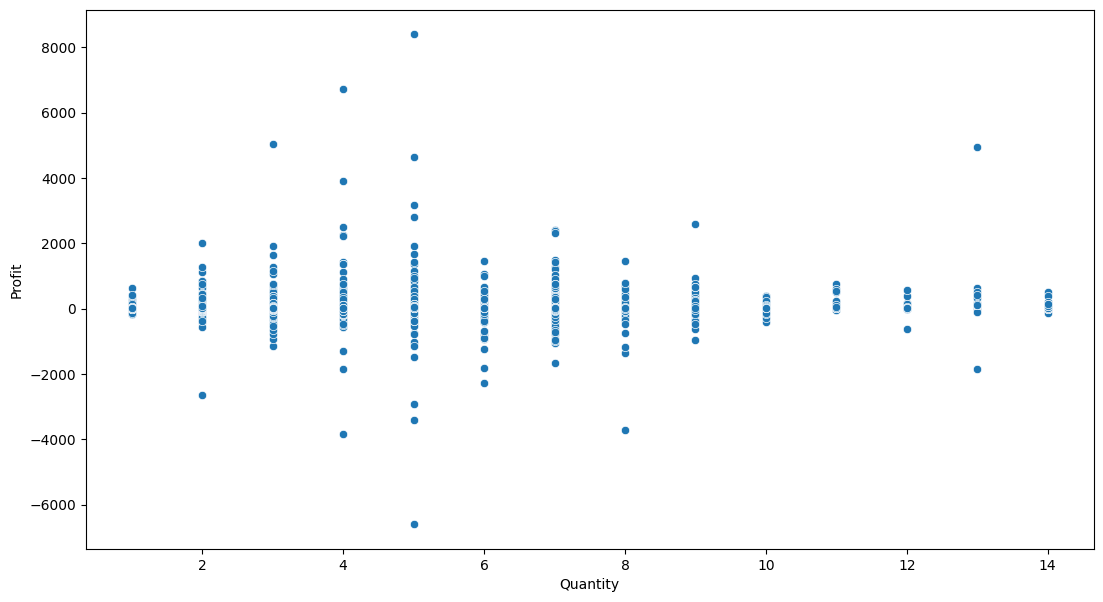

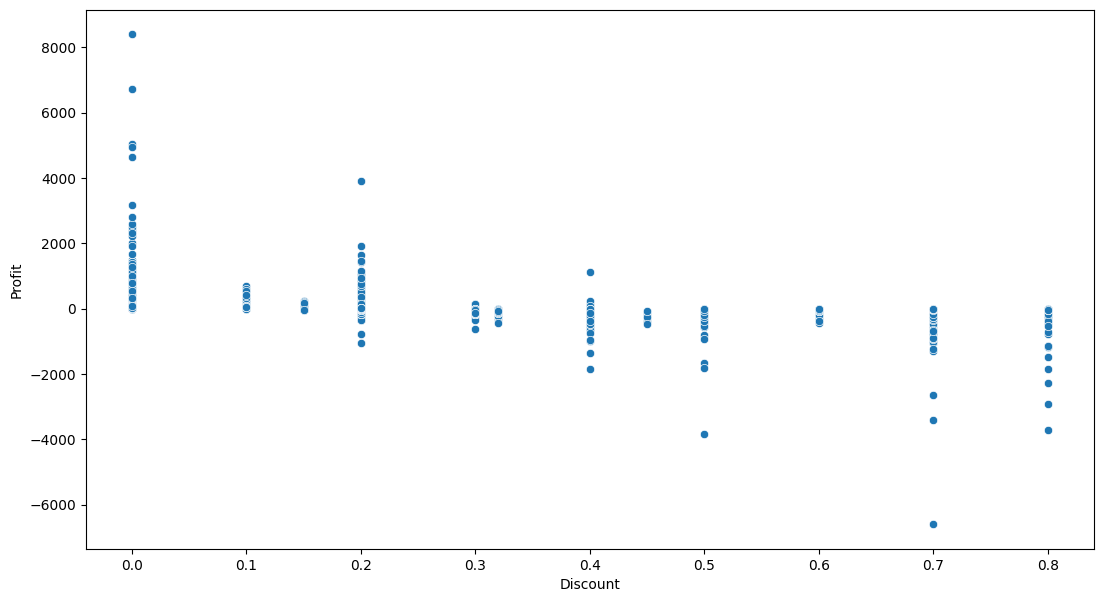

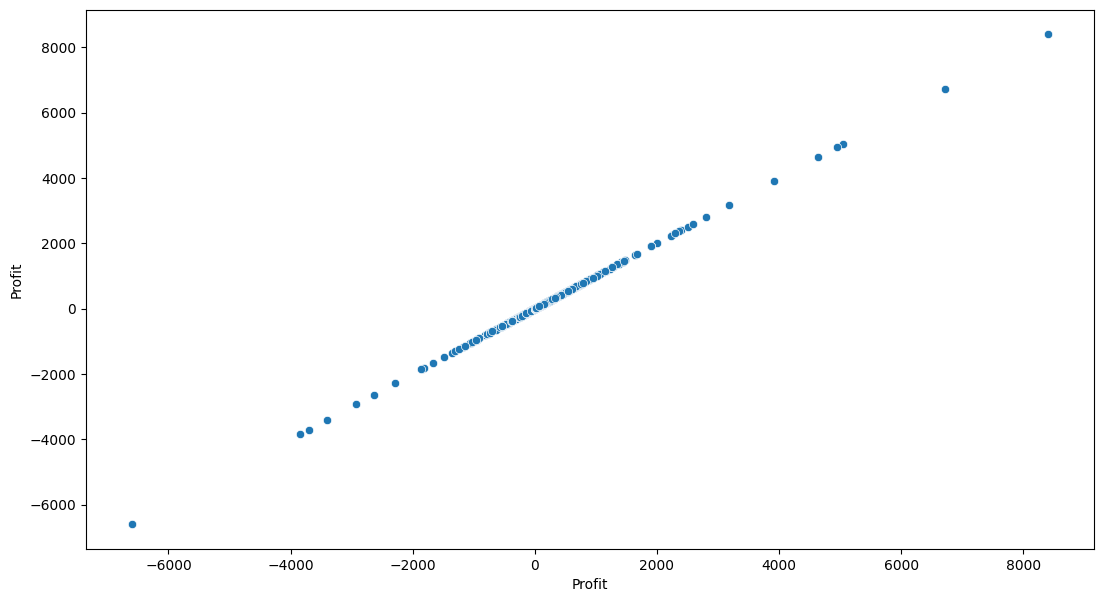

In [25]:
for i in data.columns:
    plt.figure(figsize=(13,7))
    sns.scatterplot(x=data[i], y=data['Profit'], data=data)
    plt.show()

### Correlation Analysis

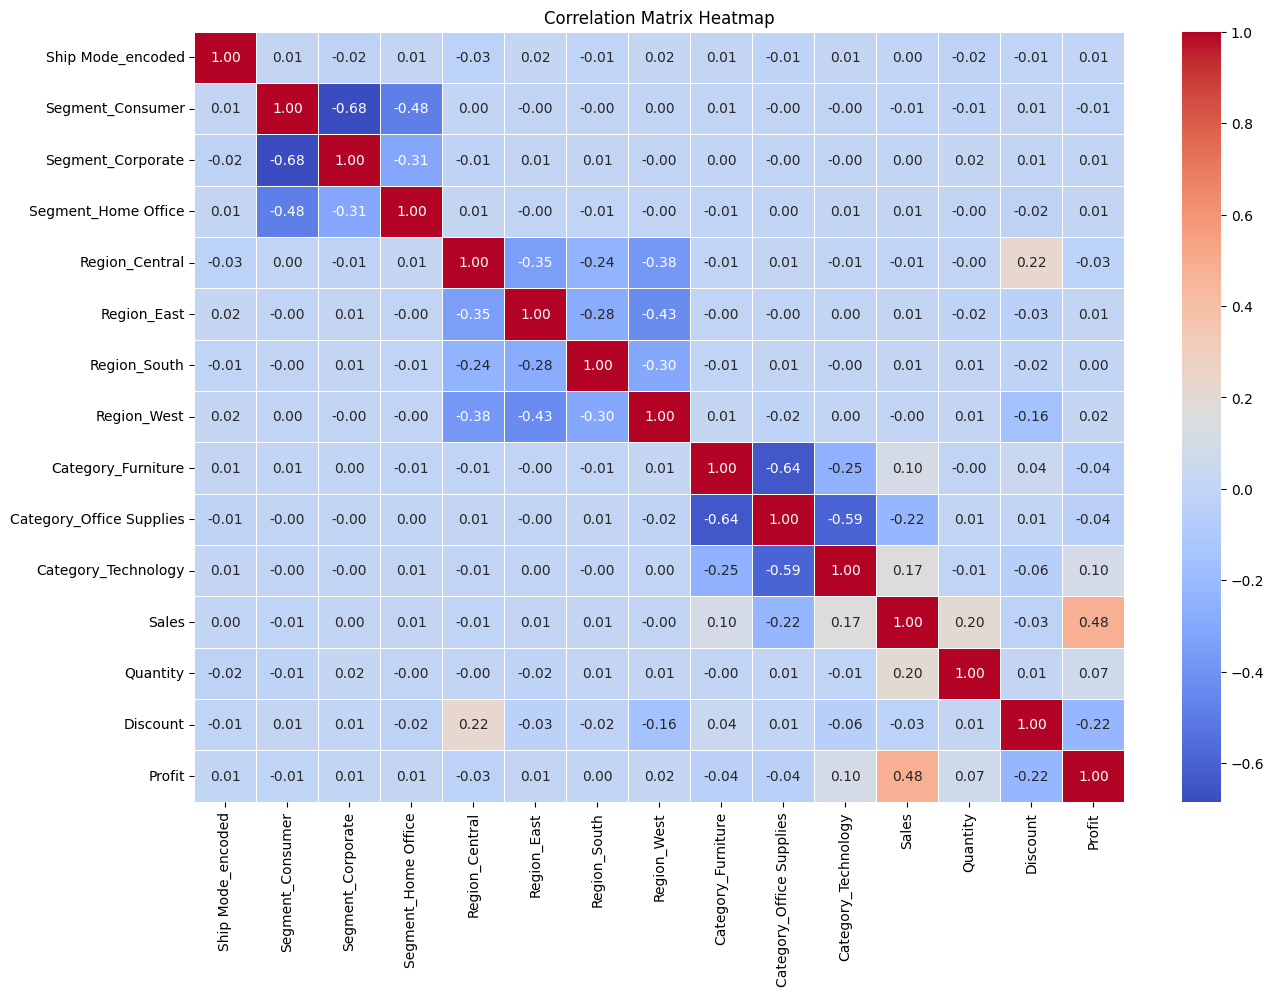

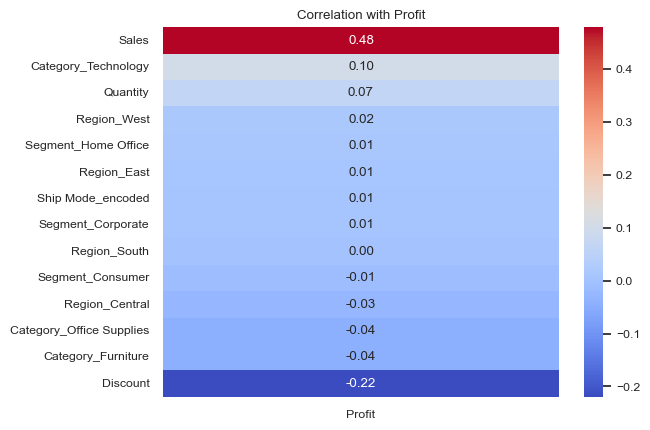

In [26]:
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()
#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['Profit'].drop('Profit')
# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Profit')
plt.show()

### Outlier Analysis

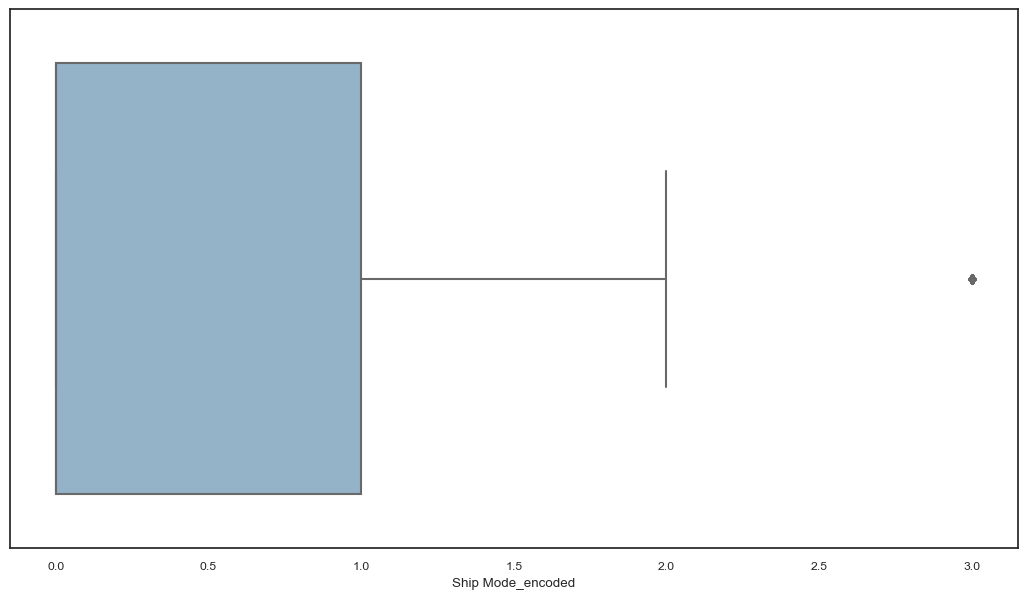

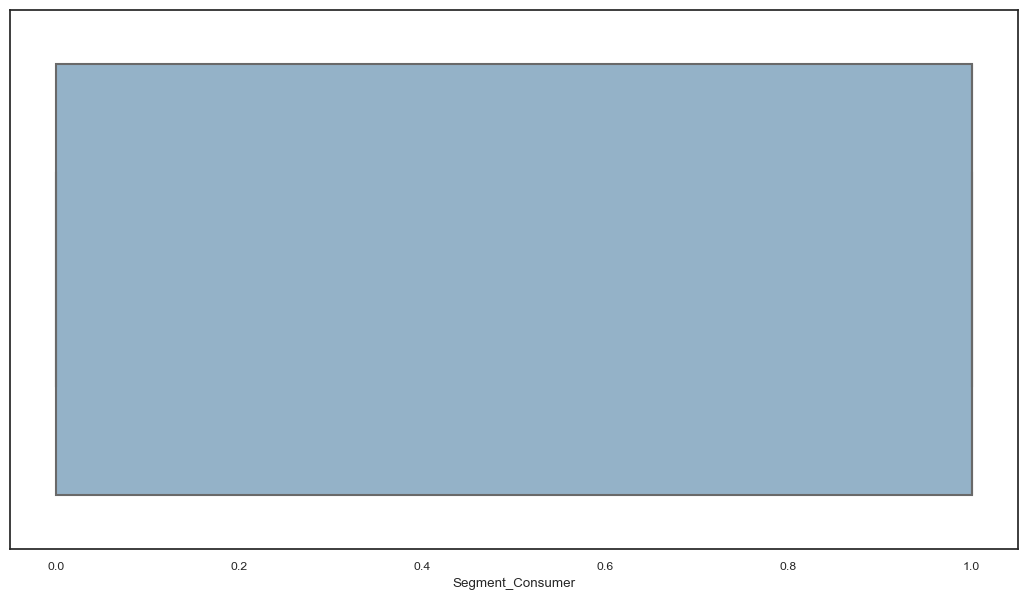

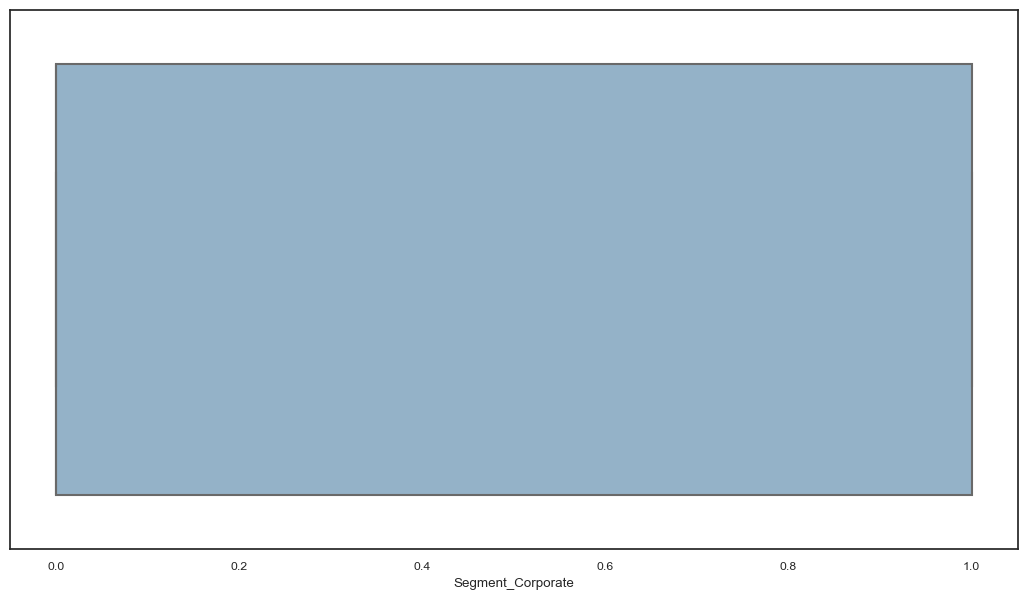

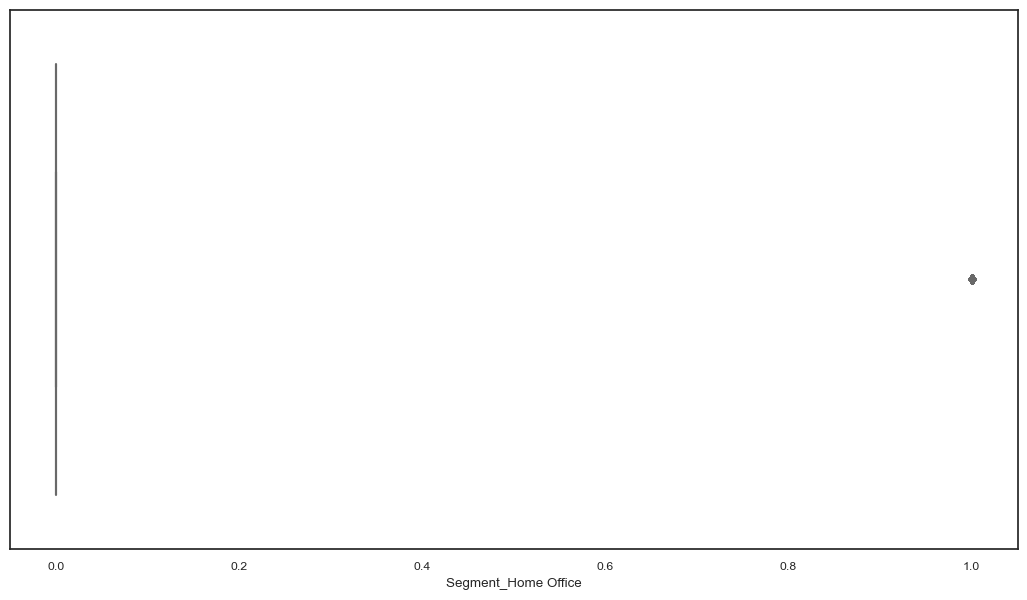

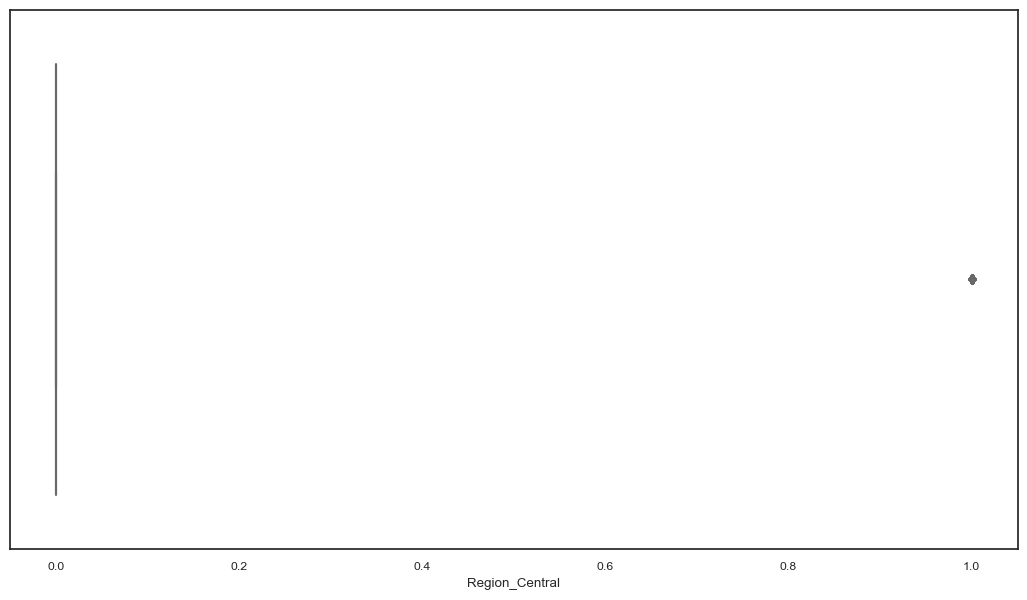

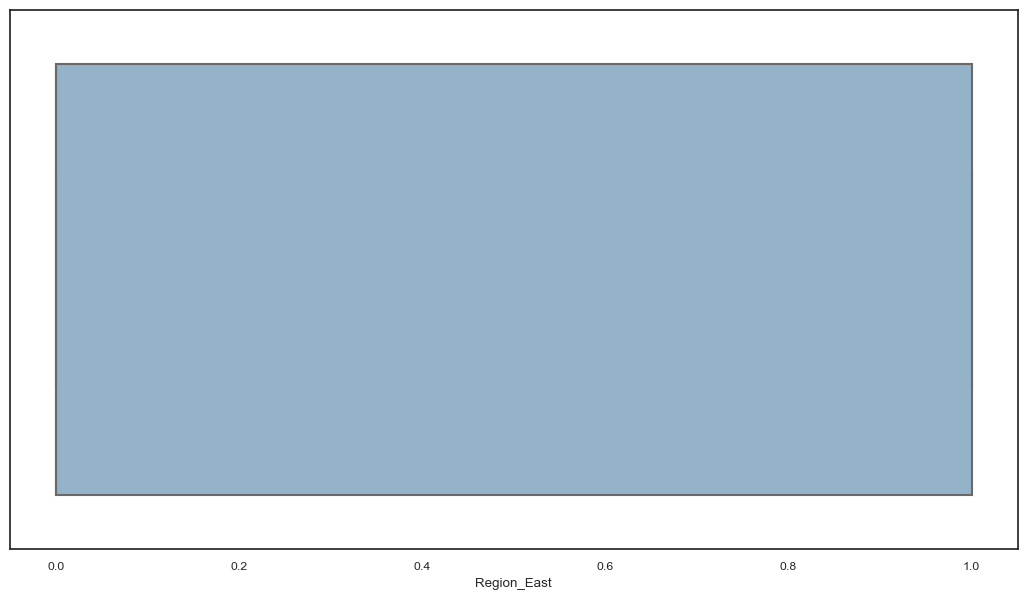

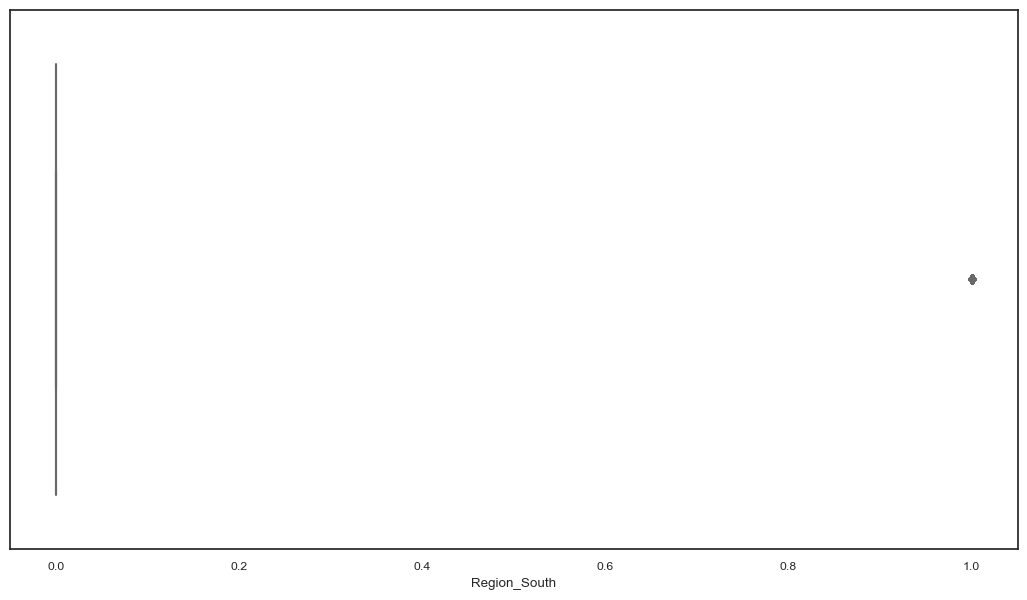

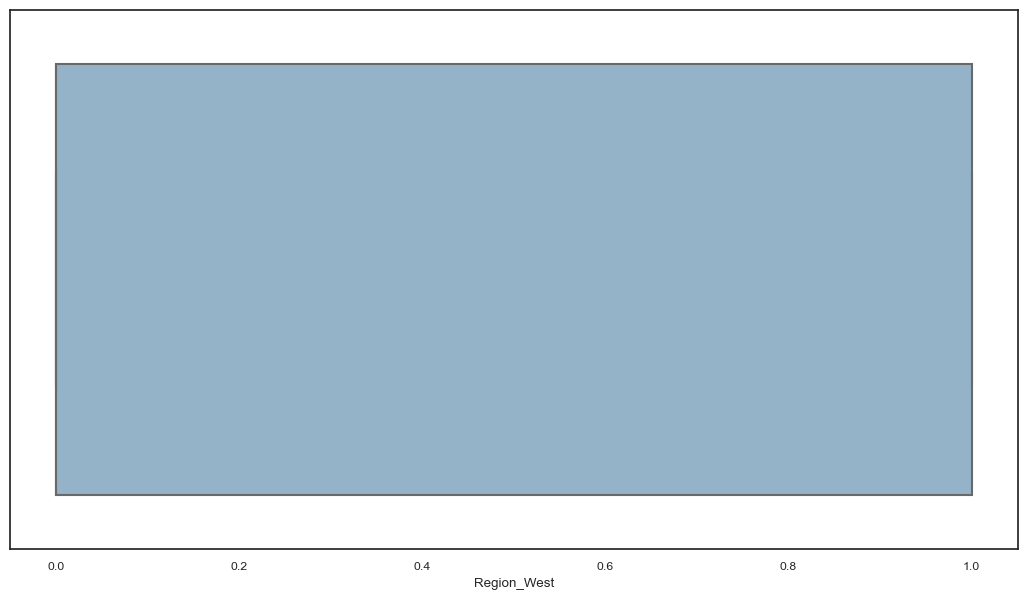

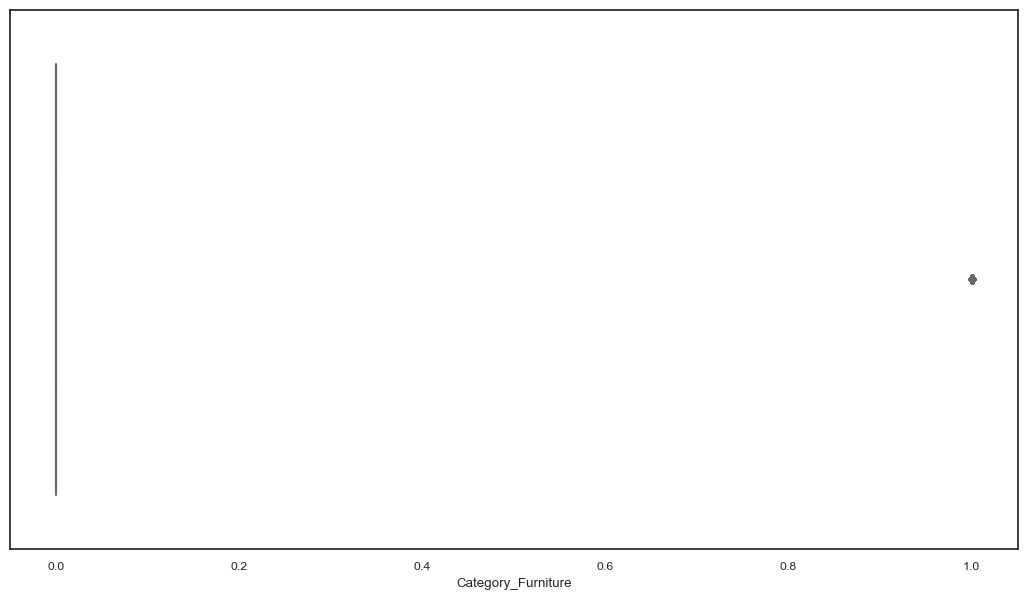

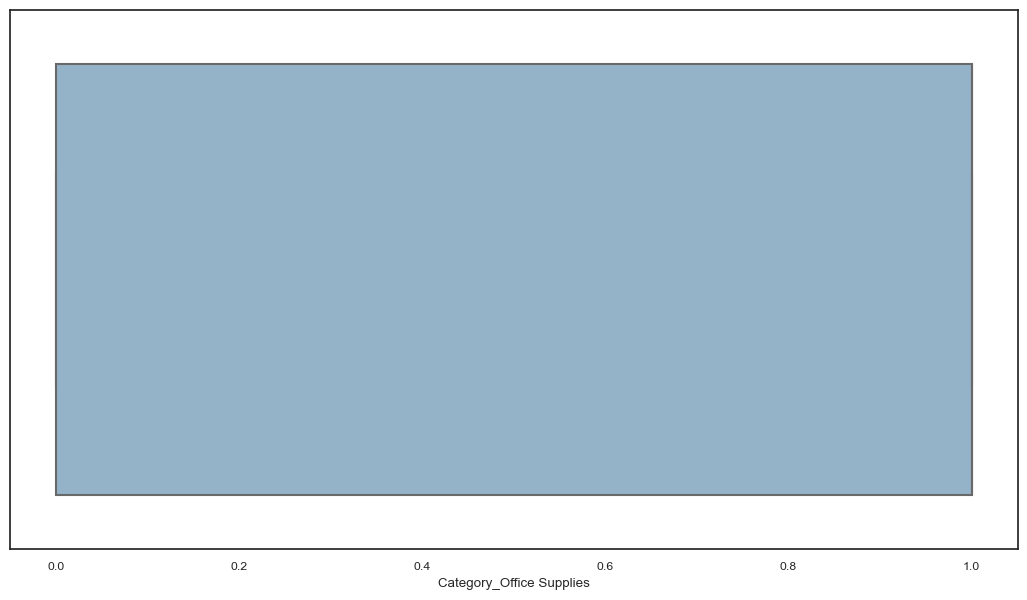

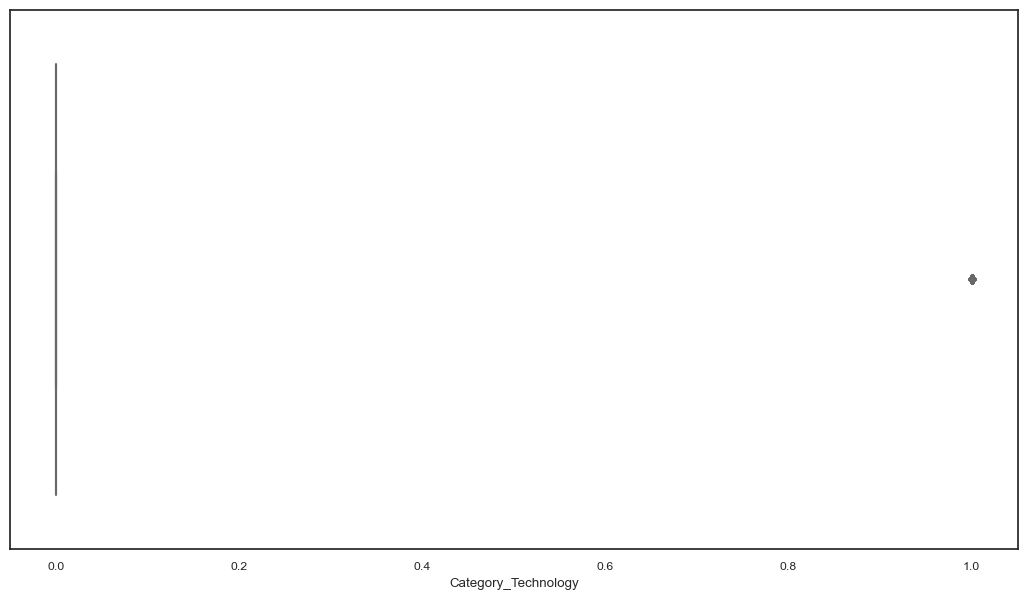

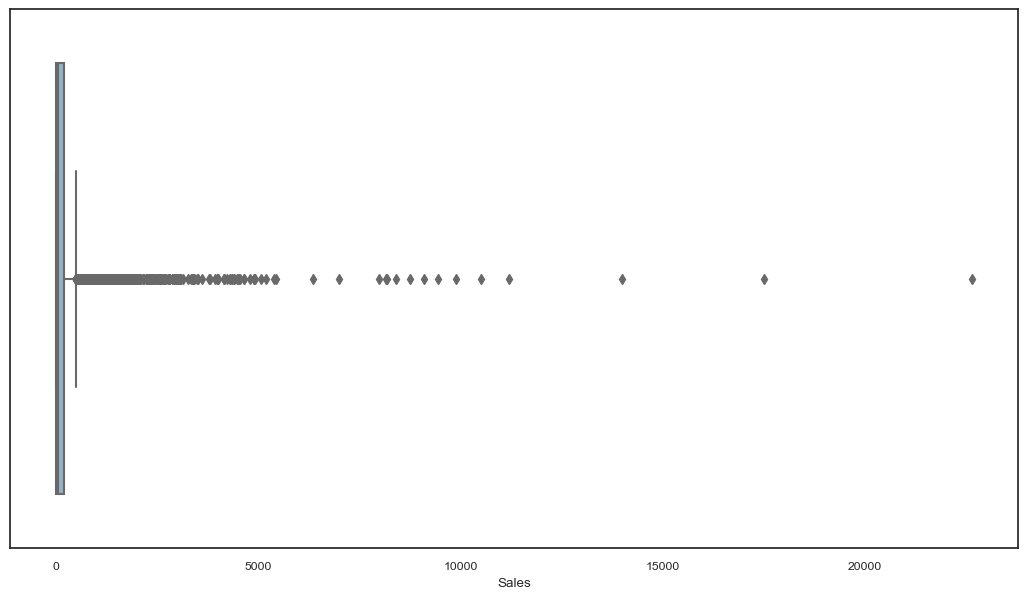

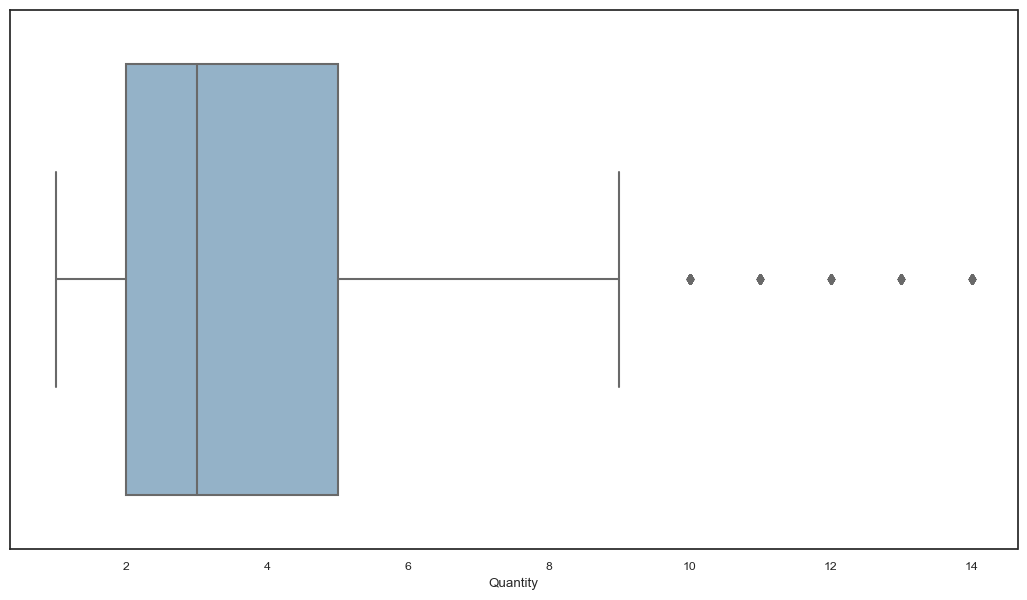

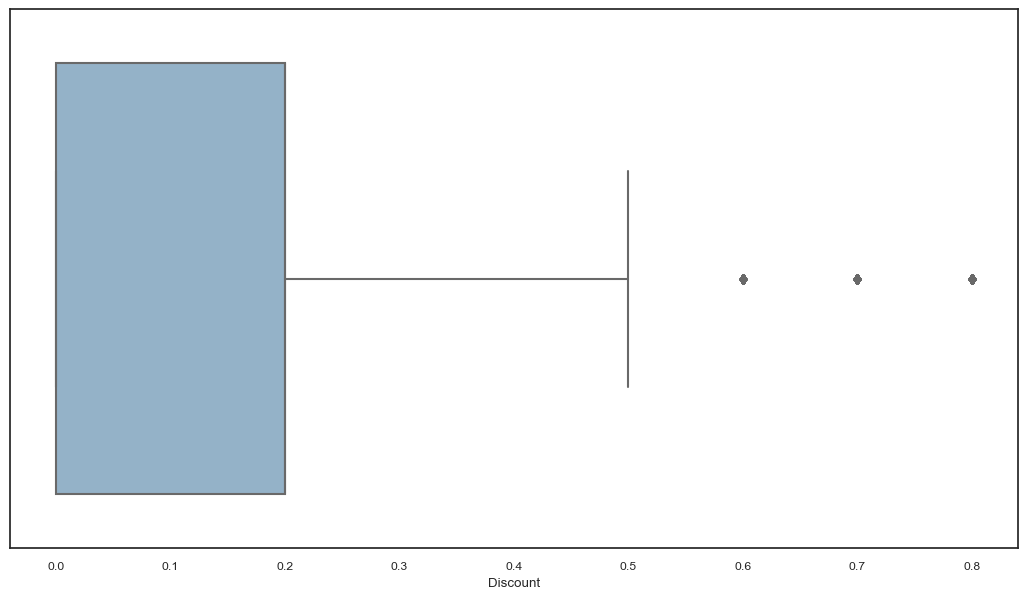

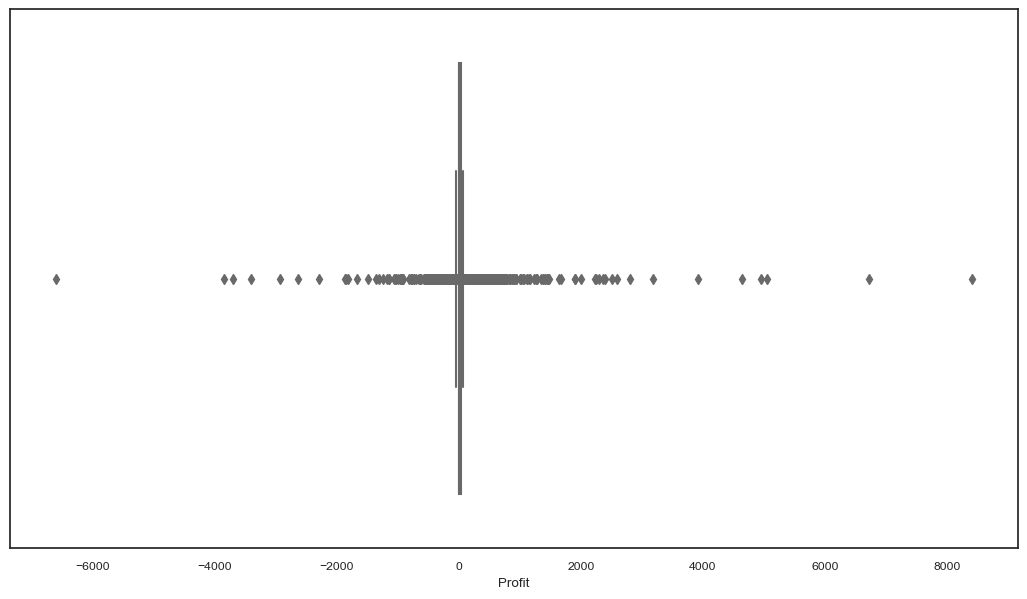

In [27]:
for i in data.columns:
    plt.figure(figsize=(13,7))
    sns.boxplot(x=data[i])
    plt.show()

# Machine Learning Models (Regression Models)

Libraries

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

Split Data

In [29]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Scaling

In [31]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)

Grid Search

In [32]:
def grid_search_func(model, params):
  grid=GridSearchCV(estimator=model,param_grid=params,cv=5,n_jobs=-1)
  grid.fit(x_train,y_train)
  print(f'The Best Hyper_Pramaters = {grid.best_params_}')

Validation

In [33]:
def valid(model):
    model.fit(x_train, y_train)
    y_pred_train=model.predict(x_train)
    y_pred_val = model.predict(x_valid)
    accuracy_train = r2_score(y_train, y_pred_train)
    accuracy_val = r2_score(y_valid, y_pred_val)
    print("train accuracy:", accuracy_train)
    print("Validation accuracy:", accuracy_val)

Accuracy

In [34]:
def acc(model):
    y_pred = model.predict(x_test)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    MAE=mean_absolute_error(y_test, y_pred)
    rsc = abs(r2_score(y_test, y_pred))
    print('mean squared error :',MSE)
    print('Root mean squared error :',RMSE)
    print('mean absolute error :',MAE)
    print('r square :',rsc)
    return rsc

1- Linear Regression

In [35]:
lr = LinearRegression()

In [36]:
valid(lr)

train accuracy: 0.4558518709229372
Validation accuracy: 0.30560306234756573


In [37]:
linearRegression_Accuracy=acc(lr)

mean squared error : 87862.80390512703
Root mean squared error : 296.4166053127372
mean absolute error : 72.1192820757981
r square : 0.8121599670352047


2- Polynomial Regression 

In [38]:
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(x_train)
X_valid_poly = poly_reg.transform(x_valid)
X_test_poly = poly_reg.transform(x_test)
lr.fit(X_train_poly, y_train)
y_poly_train_pred = lr.predict(X_train_poly)
y_poly_valid_pred = lr.predict(X_valid_poly)
accuracy_train = r2_score(y_train, y_poly_train_pred)
accuracy_val = r2_score(y_valid, y_poly_valid_pred)
print("train accuracy:", accuracy_train)
print("Validation accuracy:", accuracy_val)

train accuracy: 0.8443927216491882
Validation accuracy: 0.6942428273283177


In [39]:
y_poly_pred = lr.predict(X_test_poly)
MSE = mean_squared_error(y_test,y_poly_pred)
RMSE = np.sqrt(MSE)
MAE=mean_absolute_error(y_test, y_poly_pred)
PolynomialRegression_Accuracy= abs(r2_score(y_test, y_poly_pred))
print('mean squared error :',MSE)
print('Root mean squared error :',RMSE)
print('mean absolute error :',MAE)
print('r square :', PolynomialRegression_Accuracy)

mean squared error : 14722.8338094901
Root mean squared error : 121.3376850343293
mean absolute error : 39.836717883941965
r square : 0.6963432892526491


3- Lasso

In [40]:
lasso = Lasso()
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_search_func(lasso, param_grid)

The Best Hyper_Pramaters = {'alpha': 1}


In [41]:
lasso=Lasso(alpha=1)

In [42]:
valid(lasso)

train accuracy: 0.45575716112356734
Validation accuracy: 0.3097701753347011


In [43]:
lasso_Accuracy=acc(lasso)

mean squared error : 87173.41066314654
Root mean squared error : 295.2514363439178
mean absolute error : 70.85147271706478
r square : 0.7979413127339985


4- Ridge

In [44]:
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_search_func(ridge, param_grid)

The Best Hyper_Pramaters = {'alpha': 10}


In [45]:
ridge=Ridge(alpha=10)

In [46]:
valid(ridge)

train accuracy: 0.4558930065367339
Validation accuracy: 0.30579604561998674


In [47]:
ridge_Accuracy=acc(ridge)

mean squared error : 87704.62333767819
Root mean squared error : 296.1496637473664
mean absolute error : 71.83477941172337
r square : 0.8088975114891328


5- KNN

In [48]:
knn=KNeighborsRegressor()
param_grid = {'n_neighbors': [3,5,7,9,11,13,15,17,19]}
grid_search_func(knn, param_grid)

The Best Hyper_Pramaters = {'n_neighbors': 3}


In [49]:
knn=KNeighborsRegressor(n_neighbors=3)

In [50]:
valid(knn)

train accuracy: 0.7683046265640434
Validation accuracy: 0.3647344552119868


In [51]:
KNN_Accuracy=acc(knn)

mean squared error : 74055.59642377045
Root mean squared error : 272.13157924755893
mean absolute error : 49.36109661497416
r square : 0.5273879413065408


6- SVM

In [52]:
svr=SVR()
param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['linear', 'poly', 'rbf'], 
                'gamma': ['auto', 'scale']}
grid_search_func(svr, param_grid)

The Best Hyper_Pramaters = {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}


In [53]:
svm_model=SVR(C=10,gamma='auto',kernel='linear')

In [54]:
valid(svm_model)

train accuracy: 0.3706712595547149
Validation accuracy: 0.32965842921483535


In [55]:
SVM_Accuracy=acc(svm_model)

mean squared error : 65202.71561682153
Root mean squared error : 255.34822422883917
mean absolute error : 53.07074649333654
r square : 0.3447983188696111


7- Decision Tree

In [56]:
DTR = DecisionTreeRegressor()
param_grid = {
  'max_depth': [3,4,5,6,7,8,9,10],
}
grid_search_func(DTR, param_grid)

The Best Hyper_Pramaters = {'max_depth': 10}


In [57]:
DTR=DecisionTreeRegressor(max_depth= 8)

In [58]:
valid(DTR)

train accuracy: 0.9441160286974958
Validation accuracy: 0.4634575081851555


In [59]:
DTR_Accuracy=acc(DTR)

mean squared error : 95981.37413879248
Root mean squared error : 309.80860888424723
mean absolute error : 48.68284356682275
r square : 0.9796045205108499


8- Bagging

In [60]:
bag=BaggingRegressor(
    base_estimator=Lasso(),
    n_estimators=1000,
    max_samples=500,
    bootstrap=True,
    n_jobs=-1
)

In [61]:
valid(bag)

C:\Users\Mohamed Ali\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


train accuracy: 0.43783287145366834
Validation accuracy: 0.3738778721320357


In [62]:
Bagging_Accuracy=acc(bag)

mean squared error : 71912.1618506106
Root mean squared error : 268.16443062160687
mean absolute error : 65.35342873634458
r square : 0.48317985605543035


9- Random Forest

In [63]:
RandomForest=RandomForestRegressor(n_estimators=100,random_state=42)

In [64]:
valid(RandomForest)

train accuracy: 0.954101150315411
Validation accuracy: 0.7617663429398567


In [65]:
RandomForest_Accuracy=acc(RandomForest)

mean squared error : 61377.863247576766
Root mean squared error : 247.74556150933716
mean absolute error : 34.312642022627976
r square : 0.2659111898992066


10- Ada Boost

In [66]:
AdaBoost=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
    n_estimators=200,
    learning_rate=.5,
    random_state=42)

In [67]:
valid(AdaBoost)

C:\Users\Mohamed Ali\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


train accuracy: 0.9980254150540591
Validation accuracy: 0.7631484981726885


In [68]:
AdaBoost_Accuracy=acc(AdaBoost)

mean squared error : 70701.2603608755
Root mean squared error : 265.89708603306565
mean absolute error : 33.18296000649145
r square : 0.4582051556567195


11- Gradient Boosting

In [69]:
GradientBoost=GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=.5,
    random_state=40
)

In [70]:
valid(GradientBoost)

train accuracy: 0.9941145983720943
Validation accuracy: 0.6840457703659081


In [71]:
GradientBoost_Accuracy=acc(GradientBoost)

mean squared error : 59662.080115202756
Root mean squared error : 244.2582242529466
mean absolute error : 35.623471754043926
r square : 0.23052336517237682


12- XGB Boost

In [72]:
xgb=xgb.XGBRegressor(verbosity=0) 

In [73]:
valid(xgb)

train accuracy: 0.9956088608806832
Validation accuracy: 0.6999028710572133


In [74]:
xgb_Accuracy=acc(xgb)

mean squared error : 84756.89236444076
Root mean squared error : 291.1303700482668
mean absolute error : 36.43051033631178
r square : 0.7481009078540095


# Comparison

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Linear'),
  Text(1, 0, 'polynomial'),
  Text(2, 0, 'Lasso'),
  Text(3, 0, 'Ridge'),
  Text(4, 0, 'KNN'),
  Text(5, 0, 'SVM'),
  Text(6, 0, 'Bagging'),
  Text(7, 0, 'Random Forest'),
  Text(8, 0, 'Ada Boost'),
  Text(9, 0, 'Gradient Boosting'),
  Text(10, 0, 'XGB Boost')])

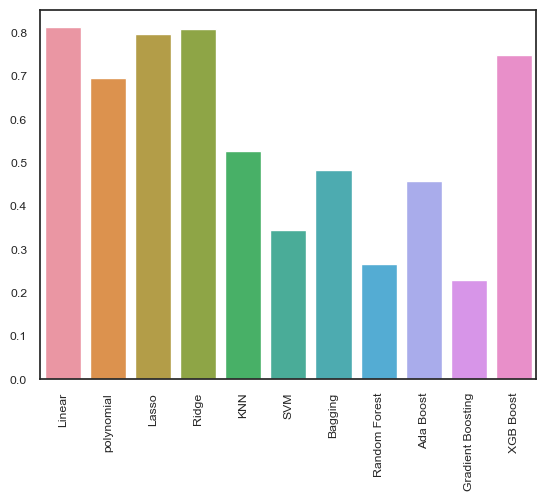

In [75]:
models_names=['Linear','polynomial','Lasso','Ridge','KNN','SVM','Bagging', 'Random Forest' ,'Ada Boost', 'Gradient Boosting', 'XGB Boost']
models_scores=[linearRegression_Accuracy,PolynomialRegression_Accuracy,lasso_Accuracy,ridge_Accuracy,KNN_Accuracy,SVM_Accuracy,Bagging_Accuracy,RandomForest_Accuracy,AdaBoost_Accuracy,GradientBoost_Accuracy,xgb_Accuracy]
sns.barplot(x=models_names, y=models_scores, data=data)
plt.xticks(rotation=90)